# Using Convolutions
  
Convolutions are the fundamental building blocks of convolutional neural networks. In this chapter, you will be introducted to convolutions and learn how they operate on image data. You will also see how you incorporate convolutions into Keras neural networks.

## Resources
  
**Notebook Syntax**
  
<span style='color:#7393B3'>NOTE:</span>  
- Denotes additional information deemed to be *contextually* important
- Colored in blue, HEX #7393B3
  
<span style='color:#E74C3C'>WARNING:</span>  
- Significant information that is *functionally* critical  
- Colored in red, HEX #E74C3C
  
---
  
**Links**
  
[NumPy Documentation](https://numpy.org/doc/stable/user/index.html#user)  
[Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)  
[Matplotlib Documentation](https://matplotlib.org/stable/index.html)  
[Seaborn Documentation](https://seaborn.pydata.org)  
[Scikit-image Documentation](https://scikit-image.org/docs/stable/)  
[Tensorflow Documentation](https://www.tensorflow.org)
  
---
  
**Notable Functions**
  
<table>
  <tr>
    <th>Index</th>
    <th>Operator</th>
    <th>Use</th>
  </tr>
  <tr>
    <td>1</td>
    <td>numpy.array</td>
    <td>A function from the NumPy library used to create arrays, which are fundamental data structures in numerical computing.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>numpy.zeros</td>
    <td>A function from the NumPy library that creates an array filled with zeros.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>tensorflow.keras.models.Sequential</td>
    <td>A class from the TensorFlow library that represents a linear stack of layers, which is the foundation for building neural network models.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>tensorflow.keras.layers.Dense</td>
    <td>A class from TensorFlow that represents a fully connected (dense) layer in a neural network.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>tensorflow.keras.layers.Conv2D</td>
    <td>A class from TensorFlow that represents a 2D convolutional layer used in convolutional neural networks (CNNs) for image processing tasks.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>tensorflow.keras.layers.Flatten</td>
    <td>A class from TensorFlow that represents a layer used to flatten the input data before feeding it into a fully connected layer.</td>
  </tr>
  <tr>
    <td>7</td>
    <td>model.compile</td>
    <td>A method used to compile a Keras model by specifying loss, optimizer, and metrics.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>tensorflow.keras.datasets.fashion_mnist.load_data</td>
    <td>A function from TensorFlow's Keras API to load the Fashion MNIST dataset.</td>
  </tr>
  <tr>
    <td>9</td>
    <td>pandas.get_dummies</td>
    <td>A function from the Pandas library to perform one-hot encoding on categorical data.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>DataFrame.to_numpy</td>
    <td>A method to convert a Pandas DataFrame to a NumPy array.</td>
  </tr>
  <tr>
    <td>11</td>
    <td>model.fit</td>
    <td>A method to train a Keras model on a given dataset.</td>
  </tr>
  <tr>
    <td>12</td>
    <td>model.evaluate</td>
    <td>A method to evaluate the performance of a trained Keras model on a test dataset.</td>
  </tr>
</table>
  
---
  
**Language and Library Information**  
  
Python 3.11.0  
  
Name: numpy  
Version: 1.24.3  
Summary: Fundamental package for array computing in Python  
  
Name: pandas  
Version: 2.0.3  
Summary: Powerful data structures for data analysis, time series, and statistics  
  
Name: matplotlib  
Version: 3.7.2  
Summary: Python plotting package  
  
Name: seaborn  
Version: 0.12.2  
Summary: Statistical data visualization  
  
Name: scikit-image  
Version: 0.21.0  
Summary: Image processing in Python  
  
Name: tensorflow  
Version: 2.13.0  
Summary: TensorFlow is an open source machine learning framework for everyone.  
  
---
  
**Miscellaneous Notes**
  
<span style='color:#7393B3'>NOTE:</span>  
  
`python3.11 -m IPython` : Runs python3.11 interactive jupyter notebook in terminal.
  
`nohup ./relo_csv_D2S.sh > ./output/relo_csv_D2S.log &` : Runs csv data pipeline in headless log.  
  
`print(inspect.getsourcelines(test))` : Get self-defined function schema  
  
<span style='color:#7393B3'>NOTE:</span>  
  
Snippet to plot all built-in matplotlib styles :
  
```python

x = np.arange(-2, 8, .1)
y = 0.1 * x ** 3 - x ** 2 + 3 * x + 2
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)
```
  

In [2]:
import numpy as np                  # Numerical Python:         Arrays and linear algebra
import pandas as pd                 # Panel Datasets:           Dataset manipulation
import matplotlib.pyplot as plt     # MATLAB Plotting Library:  Visualizations
import seaborn as sns               # Seaborn:                  Visualizations
import tensorflow as tf             # TensorFlow:               Deep-Learning Neural Networks
from tensorflow import keras        # Keras:                    Tensorflow-Keras Integration


# Setting a standard figure size
plt.rcParams['figure.figsize'] = (8, 8)


2023-08-18 16:55:08.538853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

## Convolutions
  
In the neural network that we previously constructed, each unit in the first layer had a weight connecting it separately with every pixel in the image.
  
**Using correlations in images**
  
But we know that pixels in most images are not independent from their neighbors. For example, images of objects contain edges, and neighboring pixels along an edge tend to have similar patterns. How can we use these correlations to our advantage?
  
- Using correlations in images
- Natural images contain spatial correlations (pixels along a contour or edge)
- How can we use these correlations?
  
**Biological inspiration**
  
Our own visual system uses these correlations, and each nerve cell in the visual areas in our brain responds to oriented edges at a particular location in the visual field. This image depicts a small part of the visual cortex (the scale bar is 1 millimeter in size). Each part of the image responds to some part of the visual field, and to the orientation depicted by the colors on the right. Looking for the same feature, such as a particular orientation, in every location in an image is like a mathematical operation called a convolution. This is the fundamental operation that convolutional neural networks use to process images.
  
<center><img src='../_images/convolutional-nn-how-they-work.png' alt='img' width='500'></center>
  
**What is a convolution?**
  
Let's start with a simple version: a convolution in one dimension. We create here an array that contains 5 zeros followed by 5 ones. This array contains an "edge" in the middle, where the values go from zero to one. The kernel defines the feature that we are looking for. In this case, we are looking for a change from small values on the left to large values on the right. We start the result as all zeros. Then, we slide the kernel along the array. In each location we multiply the values in the array with the values in the Kernel and sum them up. This is the result for that location.
  
<center><img src='../_images/convolutional-nn-how-they-work1.png' alt='img' width='500'></center>
  
**Convolution in one dimension**
  
In this example, the array goes between 0 and 1 twice. In this case, the edges that go from zero to one match the kernel, but the edges from 1 to 0 are the opposite of the kernel. In these locations, the convolution becomes negative.
  
<center><img src='../_images/convolutional-nn-how-they-work2.png' alt='img' width='500'></center>
  
**Image convolution**
  
Convolutions of images do the same operation, but in two dimensions. In this case, we convolve the image of a dress with a kernel that matches vertical edges on the left.
  
<center><img src='../_images/convolutional-nn-how-they-work3.png' alt='img' width='500'></center>
  
This means that when we convolve the image with this kernel, the left edge is emphasized. The right side of the dress is the opposite of this kernel, and the convolution is negative there.
  
<center><img src='../_images/convolutional-nn-how-they-work4.png' alt='img' width='500'></center>
  
**Two-dimensional convolution**
  
Now, let's look at an implementation of convolution in code. First, we create the kernel. Then, we create the array that will store the results of the convolution. We iterate over all the locations in the image. In each location, we select a window that is the size of the kernel, we multiply that window with the kernel, and then sum it up. This sum is then entered as the value of the convolved image in that location. At the end of the loop, the array will contain the results of the convolution.
  
<center><img src='../_images/convolutional-nn-how-they-work5.png' alt='img' width='500'></center>
  
**Convolution**
  
Here is a graphic that demonstrates the convolution operation. The kernel is the gray 3-by-3 box that slides over the blue input image at the bottom. In each location, the window is multiplied with the values in the kernel and added up to create the value of one of the pixels in the resulting green array. In neural networks, we call this resulting array a "feature map", because it contains a map of the locations in the image that match the feature represented by this kernel.
  
<center><img src='../_animations/convolution_plane.gif' alt='img' width='500'></center>
  
**Let's practice!**
  
Before we turn to see how this is implemented in Keras, let's get some practice with convolutions.

### One dimensional convolutions
  
A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.
  
1. Multiply each window in the input array with the kernel and sum the multiplied result and allocate the result into the correct entry in the output array (`conv`).

In [4]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+kernel.shape[0]]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


Nicely done. Notice that we've only multiplied the kernel with eight different positions

### Image convolutions
  
The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.
  
1. Select the right window from the image in each iteration and multiply this part of the image with the kernel.
2. Sum the result and allocate the sum to the correct entry in the output array (`results`).

In [6]:
im = pd.read_csv('../_datasets/brick_bw.csv').to_numpy()
print(im.shape)

(159, 240)


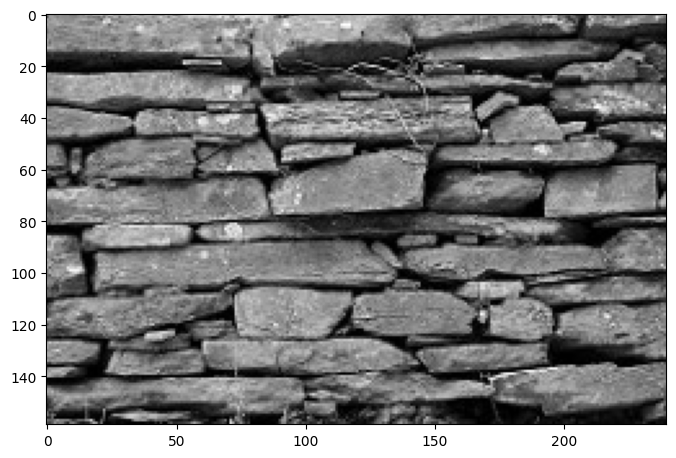

In [9]:
plt.imshow(im, cmap='gray')
plt.show()

In [13]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array, to scale for production you can do kernel.shape[0]
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[2.68104587 2.95947725 2.84313738 ... 0.         0.         0.        ]
 [3.01830077 3.07058837 3.05098049 ... 0.         0.         0.        ]
 [2.95163405 3.09934654 3.20261451 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


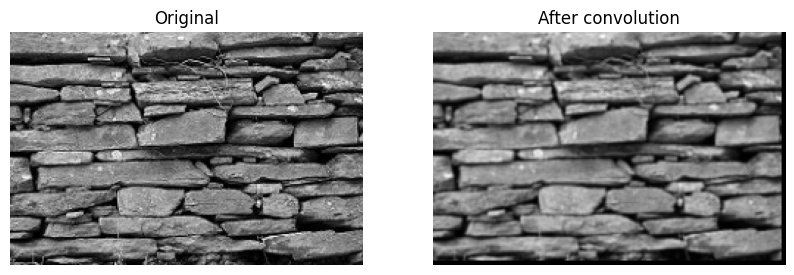

In [14]:
plot_comparison(im, result, 'After convolution')

In a future exercise, you will see how to use Keras to implement a convolution like this one.

### Defining image convolution kernels
  
In the previous exercise, you wrote code that performs a convolution given an image and a kernel. This code is now stored in a function called convolution() that takes two inputs: image and kernel and produces the convolved image. In this exercise, you will be asked to define the kernel that finds a particular feature in the image.
  
For example, the following kernel finds a vertical line in images:
  
```python
np.array([[-1, 1, -1], 
          [-1, 1, -1], 
          [-1, 1, -1]])
```
  
1. Define a kernel that finds horizontal lines in images.
2. Define a kernel that finds a light spot surrounded by dark pixels.
3. Define a kernel that finds a dark spot surrounded by bright pixels.

In [16]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+3, jj:jj+3] * kernel)

    return result

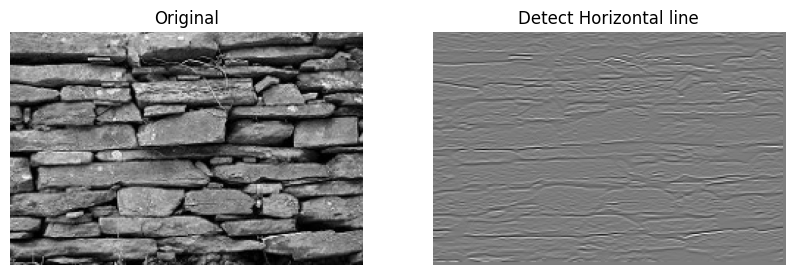

In [17]:
# Define the kernel that detect the horizontal line
kernel = np.array(
    [[-1, -1, -1],
     [1, 1, 1],
     [-1, -1, -1]]
)
result = convolution(im, kernel)
plot_comparison(im, result, 'Detect Horizontal line')

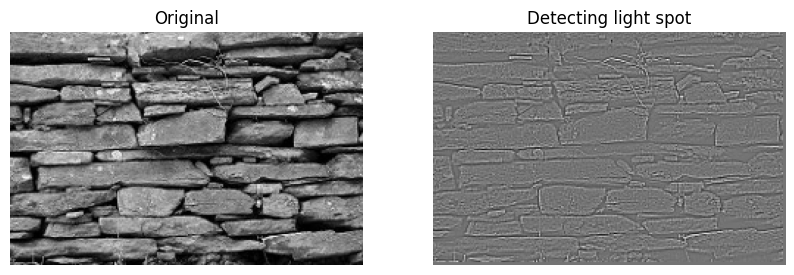

In [20]:
# Define a kernel that finds a light spot surrounded by dark pixels.
kernel = np.array(
    [[-1, -1, -1], 
     [-1, 1, -1],
     [-1, -1, -1]]
)

result = convolution(im, kernel)
plot_comparison(im, result, 'Detecting light spot')

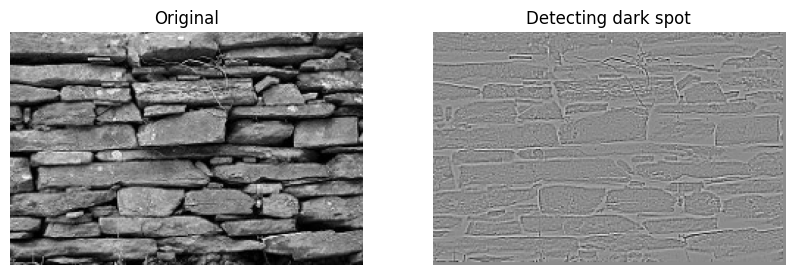

In [21]:
# Define a kernel that finds a dark spot surrounded by bright pixels.
kernel = np.array(
    [[1, 1, 1], 
     [1, -1, 1],
     [1, 1, 1]]
)

result = convolution(im, kernel)
plot_comparison(im, result, 'Detecting dark spot')

Great work!

# Implementing convolutions in Keras
  
Keras has objects to represent convolution layers.
  
**Keras Convolution layer**
  
Here, we have a two-dimensional convolution, that we can use to analyze images. It resembles the "`Dense`" layers, but instead of having every unit in the layer connected to every unit in the previous layer, these connect to the previous layer through a convolution kernel. This means that the output of each unit in this layer is a convolution of a kernel over the image input. Here, we have ten convolution units. During training of a neural network that has convolutional layers, the kernels in each unit would be adjusted using back-propagation. The principle is the same as learning in the `Dense` layers that we have seen so far, but with fewer weights. A dense layer has one weight for each pixel in the image, but a convolution layer has only one weight for each pixel in the kernel. For example, if we set the `kernel_size=` argument to 3, that means that the kernel of each unit has 9 pixels. If the layer has 10 units, it would have 90 parameters for these kernels.
  
```python
from tensorflow.keras.layers import Conv2D

Conv2D(10, kernel_size=3, activation='relu')
```
  
**Integrating convolution layers into a network**
  
To build a network that contains a convolution layer, we need to import the `Sequential` model, and we will need the `Dense` as well as the `Conv2D` layers. In addition to these layers, we will also need a `Flatten` layer. This serves as a connector between convolution and densely connected layers. We initialize a `Sequential` model and add a first convolution layer. In addition to the function arguments that I showed you before, the number of units, the kernel size and the activation function, here we use the `"relu"` activation, we also add here the input shape. This is the size of each of the input images to the network. For example, for the images of clothing that we have been using, we might have image_rows and `images_cols=` both equal to 28. To connect this layer to the next one, we add a `Flatten` layer. This takes the output of the convolution, that we previously referred to as a "feature map", and flattens it into a one-dimensional array. This is the expected input into the densely connected layer that is then added to the network as an output layer. Here, the output is one of three classes of clothing, so there are three units. To classify among the categories represented by the three units, we use the `'softmax'` activation function.
  
<center><img src='../_images/building-convolution-nn.png' alt='img' width='600'></center>
  
**Our CNN**
  
This is a diagram that describes the network that we created. The inputs are images of 28 by 28 pixels. The `Conv2D` operation goes to 10 feature maps of 28-by-28 pixels each and the `Flatten` operation takes us to 3 units of the output.
  
<center><img src='../_images/building-convolution-nn1.png' alt='img' width='500'></center>
  
**Fitting a CNN**
  
Just like before, the next step is to compile the model, choosing the optimizer, and the loss function that we would like to use for fitting. For classification tasks categorical cross-entropy is an appropriate loss function. We can also specify the metrics we would like to see during training, here just the accuracy. Our training data are 50 samples of images of clothing. Each training item is a 28 by 28 pixel image with one channel. When we trained a fully-connected network, composed entirely of densely connected layers, we had to reshape this input, before feeding it to the network. Here, we would like the pixels to retain their spatial relationships, so we don't do that. That is why we had to specify the input shape when we defined the convolutional layer. We fit the model with training data and training labels, after which we can test the accuracy of the model on a separate test data set.
  
<center><img src='../_images/building-convolution-nn3.png' alt='img' width='500'></center>
  
**Let's practice!**
  
Time to put this into practice.

### Convolutional network for image classification
  
Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (`Dense`) layers (for readout). In this exercise, you will construct a small convolutional network for classification of the data from the fashion dataset.
  
1. Add a `Conv2D` layer to construct the input layer of the network. Use a kernel size of 3 by 3. You can use the `img_rows` and `img_cols` objects available in your workspace to define the `input_shape=` of this layer.
2. Add a `Flatten` layer to translate between the image processing and classification part of your network.
3. Add a `Dense` layer to classify the 3 different categories of clothing in the dataset.

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

img_rows, img_cols = 28, 28

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an outputlayer for the 3 categories
model.add(Dense(3, activation='softmax'))


Congratulations! You just built a model with one convolutional layer.

### Training a CNN to classify clothing types
  
Before training a neural network it needs to be compiled with the right cost function, using the right optimizer. During compilation, you can also define metrics that the network calculates and reports in every epoch. Model fitting requires a training data set, together with the training labels to the network.
  
The `Conv2D` `model` you built in the previous exercise is available in your workspace.
  
1. Compile the network using the 'adam' optimizer and the `'categorical_crossentropy'` cost function. In the metrics list define that the network to report `'accuracy'`.
2. Fit the network on `train_data` and `train_labels`. Train for 3 `epochs=` with a `batch_size=` of 10 images. In training, set aside 20% of the data as a validation set, using the `validation_split=` keyword argument.

In [23]:
# (X)(y)
# (X_train, y_train)(X_test, y_test)
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Filters the training data and selects only images with labels 0, 1, or 2 (representing shirts, dresses, and shoes).
# Limit the dataset to the first 50 samples meeting these criteria. 
# The .reshape() function is used to adjust the shape of the images to match the expected input shape for the convolutional neural network (CNN).
train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)

# This line filters the training labels to match the selected images and keeps only the first 50 labels.
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]

# OHE
train_labels = pd.get_dummies(train_labels).to_numpy()

# Doing the same process with the testing
test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

In [24]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model on a training set
model.fit(
    x=train_data, 
    y=train_labels, 
    validation_split=0.2,
    epochs=3, 
    batch_size=10
)

Epoch 1/3
4/4 [==============================] - 4s 378ms/step - loss: 70.7963 - accuracy: 0.4000 - val_loss: 17.2364 - val_accuracy: 0.8000
Epoch 2/3
4/4 [==============================] - 0s 94ms/step - loss: 19.3934 - accuracy: 0.7000 - val_loss: 30.5165 - val_accuracy: 0.6000
Epoch 3/3
4/4 [==============================] - 0s 45ms/step - loss: 12.5822 - accuracy: 0.8000 - val_loss: 4.1723e-07 - val_accuracy: 1.0000


Validation accuracy converges to 100%!

### Evaluating a CNN with test data
  
To evaluate a trained neural network, you should provide a separate testing data set of labeled images. The model you fit in the previous exercise is available in your workspace.
  
1. Evaluate the data on a separate test set: `test_data` and `test_labels`.
2. Use the same `batch_size=` that was used for fitting (10 images per batch).

In [25]:
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels, batch_size=10)

1/1 [==============================] - 0s 67ms/step - loss: 2.7486 - accuracy: 0.9000


[2.748584747314453, 0.8999999761581421]

The first number in the output is the value of the cross-entropy loss, the second is the value of the accuracy.

## Tweaking your convolutions
  
Let's talk about the details of convolutions, and how you might tweak them to do things slightly differently.
  
**Convolution**
  
This is an animation of a convolution that you have seen before. One thing that you might have noticed before is that the blue input image is larger than the green output image. This is because the convolution kernel has the size of three-by-three pixels. In this case, it converts a three-by-three window into one pixel in the output image. One way to deal with this issue is to zero-pad the input image.
  
<center><img src='../_animations/no_padding_no_strides.gif' alt='gif' width='200'></center>
  
**Convolution with zero padding**
  
Here's what that looks like. The dashed boxes around the central image are zeros that are added to the image. As you can see, when the input image is zero padded, the output feature map has the same size as the input. This can be useful if you want to build a network that has many layers. Otherwise, you might lose a pixel off the edge of the image in each subsequent layer.
  
<center><img src='../_animations/convolution_animation.gif' alt='gif' width='300'></center>
  
**Zero padding in Keras**
  
To implement zero padding in keras, we will use the `Conv2D` object's `padding=` keyword argument. If we provide the value `"valid"`, no zero padding is added. This is also the default behavior, so if you don't specify padding, this is what you will get.
  
On the other hand, if we provide the value `"same"`, zero padding will be applied to the input to this layer, so that the output of the convolution has the same size as the input into the convolution.
  
**Strides**
  
Another factor that affects the size of the output of a convolution is the size of the step that we take with the kernel between input pixels. This is called the size of the stride. For example, in this animation the kernel is strided by two pixels in each step. This means again that the output size is smaller than the input size.
  
<center><img src='../_animations/padding_strides.gif' alt='gif' width='300'></center>
  
**Strides in Keras**
  
Strides are also implemented as a keyword argument to the `Conv2D` layers. The default is for the `strides=` to be set to 1. This means that the kernel slides along the image and is multiplied and summed with each pixel location.
  
If the `strides=` is set to more than 1, the kernel jumps in steps of that number of pixels. This also means that the output will be smaller.
  
**Example**
  
For example, if the input image is five by five and there is both zero padding and `strides=` set to 2, the output will have a size of three by three.
  
**Calculating the size of the output**
  
Generally, we can calculate the size of the output using a simple formula.
  
$formula.$  
  
$Output = (I - K + 2P) / (S) + 1$ 
  
$Where.$  
  
$I =$ is the size of the input  
$K =$ is the size of the kernel  
$P =$ is the size of the zero padding  
$S =$ is the stride  
  
For example, if the input is $28$ pixels, the kernel is $3\text{ by }3$, the padding is of $1$ and the stride is $1$, this number will be: $(28 - 3 + 2) / (1) + 1 = 28$. If instead the stride is $3$ the output size would be $10\text{ by }10$.
  
**Dilated convolutions**
  
Finally, you can also tweak the spacing between the pixels affected by the kernel. This is called a dilated convolution. In this case, the convolution kernel has only 9 parameters, but it has the same field of view as a kernel that would have the size 5 by 5. This is useful in cases where you need to aggregate information across multiple scales.
  
<center><img src='../_animations/dilation.gif' alt='gif' width='300'></center>
  
**Dilation in Keras**
  
This too is controlled through a keyword argument, "`dilation_rate=`", that sets the distance between subsequent pixels.
  

### Add padding to a CNN
  
Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.
  
1. Add a `Conv2D` layer and choose a padding such that the output has the same size as the input.

In [26]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(
    10, 
    kernel_size=3, 
    activation='relu', 
    input_shape=(img_rows, img_cols, 1), 
    padding='same'
))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

Great job! With `padding=` set to `'same'`, the output layer will have the same size as the input layer!

### Add strides to a convolutional network
  
The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.
  
1. Construct a neural network with a `Conv2D` layer with strided convolutions that skips every other pixel.

In [27]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(
    10, 
    kernel_size=3, 
    activation='relu', 
    input_shape=(img_rows, img_cols, 1), 
    strides=2
))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

With strides set to 2, the network skips every other pixel.

### Calculate the size of convolutional layer output
  
Zero padding and strides affect the size of the output of a convolution.
  
What is the size of the output for an input of size 256 by 256, with a kernel of size 4 by 4, padding of 1 and strides of 2?
  
Possible answers
  
- [ ] 127
- [ ] 255
- [x] 128
- [ ] 256
  
That's right!